In [19]:
import re
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
from scipy.stats import chi2_contingency

In [20]:
#dataframes to decode main tables
entidades=pd.read_csv('../Data/ENTIDADES.csv')
nacionalidad=pd.read_csv('../Data/NACIONALIDAD.csv')
paciente=pd.read_csv('../Data/PACIENTE.csv')
result_antig=pd.read_csv('../Data/RESULT_ANTIG.csv')
result_lab=pd.read_csv('../Data/RESULT_LAB.csv')
sector=pd.read_csv('../Data/SECTOR.csv')
sexo=pd.read_csv('../Data/SEXO.csv')
clasificacion_final=pd.read_csv('../Data/CLASIF_FINAL.csv')
si_no_pd=pd.read_csv('../Data/SI_NO.csv')


In [21]:
dataframes=[]
for i in range(1):
    
    datalocation=f'../Data/COVID202{i}.csv'
    dataframes.append(pd.read_csv(datalocation).drop({'FECHA_ACTUALIZACION',
                                                'ENTIDAD_NAC',
                                                'ENTIDAD_RES',
                                                'MUNICIPIO_RES',
                                                'ORIGEN',
                                                'NEUMONIA',
                                                'HABLA_LENGUA_INDIG',
                                                'OTRA_COM',
                                                'TABAQUISMO',
                                                'OTRO_CASO',
                                                'TOMA_MUESTRA_LAB',
                                                'TOMA_MUESTRA_ANTIGENO',
                                                'MIGRANTE',
                                                'PAIS_NACIONALIDAD'}
                                                ,axis=1))
    print(datalocation)


C:\Users\felip\AppData\Local\Temp\ipykernel_17692\4030609830.py:5: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(datalocation).drop({'FECHA_ACTUALIZACION',


../Data/COVID2020.csv


In [22]:
dataframes[0].head()

,ID_REGISTRO,SECTOR,ENTIDAD_UM,SEXO,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,EDAD,...,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,RESULTADO_LAB,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,PAIS_ORIGEN,UCI
0,z4d6fe,6,24,1,1,2020-12-06,2020-11-30,9999-99-99,97,55,...,2,2,2,2,2,1,97,3,97,97
1,z2a3cf,6,24,2,1,2020-02-20,2020-02-18,9999-99-99,97,59,...,2,2,2,2,2,97,97,6,97,97
2,z1e370,12,14,1,1,2020-04-22,2020-04-18,9999-99-99,97,42,...,2,2,2,2,2,2,97,7,97,97
3,z3bf80,12,8,2,1,2020-07-28,2020-07-20,9999-99-99,97,35,...,2,2,2,2,2,1,97,3,97,97
4,zz7067,12,9,2,1,2020-08-18,2020-08-17,9999-99-99,97,51,...,2,1,2,2,2,2,97,7,97,97


In [23]:
complete_data=pd.DataFrame()
print(complete_data)

Empty DataFrame
Columns: []
Index: []


In [24]:
for dataframe in dataframes:
    complete_data=pd.concat([complete_data,dataframe])

In [25]:
#Reduce complete_data to 1000 rows
complete_data=complete_data.sample(1000)

In [26]:
#Clean some columns data due to accents and ñ
complete_data['PAIS_ORIGEN']=complete_data['PAIS_ORIGEN'].str.replace('á','a')
complete_data['PAIS_ORIGEN']=complete_data['PAIS_ORIGEN'].str.replace('é','e')
complete_data['PAIS_ORIGEN']=complete_data['PAIS_ORIGEN'].str.replace('í','i')
complete_data['PAIS_ORIGEN']=complete_data['PAIS_ORIGEN'].str.replace('ú','u')
complete_data['PAIS_ORIGEN']=complete_data['PAIS_ORIGEN'].str.replace('ó','u')
complete_data['PAIS_ORIGEN']=complete_data['PAIS_ORIGEN'].str.replace('ñ','n')

In [27]:
complete_data

,ID_REGISTRO,SECTOR,ENTIDAD_UM,SEXO,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,EDAD,...,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,RESULTADO_LAB,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,PAIS_ORIGEN,UCI
2963182,2a5a66,12,9,1,1,2020-12-11,2020-12-11,9999-99-99,97,25,...,2,2,2,2,2,97,2,7,97,97
3708186,10a21c,6,21,1,1,2020-08-09,2020-07-30,9999-99-99,97,47,...,2,2,2,1,2,2,97,7,97,97
544789,1a4d80,12,28,1,1,2020-06-19,2020-06-14,9999-99-99,97,43,...,2,1,2,2,2,2,97,7,97,97
433337,0f036f,3,2,2,1,2020-06-09,2020-06-07,9999-99-99,97,54,...,2,2,2,1,2,1,97,3,97,97
3710425,133007,12,9,1,1,2020-08-12,2020-08-10,9999-99-99,97,15,...,2,2,2,2,2,2,97,7,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937273,1aaa4c,12,9,1,1,2020-07-21,2020-07-10,9999-99-99,97,58,...,2,2,2,2,2,2,97,7,97,97
1211983,00e77c,12,19,1,1,2020-08-11,2020-08-01,9999-99-99,97,53,...,2,2,2,1,2,2,97,7,97,97
3440645,2355c7,12,9,1,1,2020-12-31,2020-12-26,9999-99-99,97,64,...,2,2,2,2,2,97,1,3,97,97
2126252,27c6a4,12,24,1,1,2020-10-22,2020-10-20,9999-99-99,97,25,...,2,2,2,2,2,1,97,3,97,97


In [28]:
#REMOVE/RENAME COLUMNS BUT FIRST FILTER IMPORTANT INFORMATION

complete_data=complete_data.loc[complete_data['INDIGENA']==2]
complete_data=complete_data.drop({'INDIGENA'},axis=1)

complete_data=complete_data.rename(columns={'UCI':'CUIDADOS_INTENSIVOS'})

complete_data=complete_data.rename(columns={'FECHA_DEF':'FALLECIO'})
complete_data['FALLECIO']=complete_data.loc[complete_data['FALLECIO']!='9999-99-99']['FALLECIO'].str.replace(r'.+','SI',regex=True)
complete_data['FALLECIO']=complete_data['FALLECIO'].replace(np.nan,'NO',regex=True)


In [29]:
complete_data

,ID_REGISTRO,SECTOR,ENTIDAD_UM,SEXO,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FALLECIO,INTUBADO,EDAD,...,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,RESULTADO_LAB,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,PAIS_ORIGEN,CUIDADOS_INTENSIVOS
3708186,10a21c,6,21,1,1,2020-08-09,2020-07-30,NO,97,47,...,2,2,2,1,2,2,97,7,97,97
544789,1a4d80,12,28,1,1,2020-06-19,2020-06-14,NO,97,43,...,2,1,2,2,2,2,97,7,97,97
433337,0f036f,3,2,2,1,2020-06-09,2020-06-07,NO,97,54,...,2,2,2,1,2,1,97,3,97,97
3710425,133007,12,9,1,1,2020-08-12,2020-08-10,NO,97,15,...,2,2,2,2,2,2,97,7,97,97
2207125,325264,4,15,2,2,2020-10-28,2020-10-19,SI,2,84,...,2,2,2,2,2,2,97,7,97,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937273,1aaa4c,12,9,1,1,2020-07-21,2020-07-10,NO,97,58,...,2,2,2,2,2,2,97,7,97,97
1211983,00e77c,12,19,1,1,2020-08-11,2020-08-01,NO,97,53,...,2,2,2,1,2,2,97,7,97,97
3440645,2355c7,12,9,1,1,2020-12-31,2020-12-26,NO,97,64,...,2,2,2,2,2,97,1,3,97,97
2126252,27c6a4,12,24,1,1,2020-10-22,2020-10-20,NO,97,25,...,2,2,2,2,2,1,97,3,97,97


In [30]:
#Replace data on complete_data with keys

complete_data2=complete_data.copy()

def replace_with_keyvalues(disease,key_dataframe,main_dataframe):
    key_dataframe=key_dataframe.rename(columns={'CLAVE':disease})
    main_dataframe=pd.DataFrame.merge(main_dataframe,key_dataframe,on=disease,how='inner')
    main_dataframe=main_dataframe.drop({disease},axis=1)
    main_dataframe=main_dataframe.rename(columns={'DESCRIPCION':disease})
    return main_dataframe

#catologue si_no replace data

complete_data2=replace_with_keyvalues('INTUBADO',si_no_pd,complete_data2)
complete_data2=replace_with_keyvalues('EMBARAZO',si_no_pd,complete_data2)
complete_data2=replace_with_keyvalues('DIABETES',si_no_pd,complete_data2)
complete_data2=replace_with_keyvalues('EPOC',si_no_pd,complete_data2)
complete_data2=replace_with_keyvalues('ASMA',si_no_pd,complete_data2)
complete_data2=replace_with_keyvalues('INMUSUPR',si_no_pd,complete_data2)
complete_data2=replace_with_keyvalues('HIPERTENSION',si_no_pd,complete_data2)
complete_data2=replace_with_keyvalues('CARDIOVASCULAR',si_no_pd,complete_data2)
complete_data2=replace_with_keyvalues('OBESIDAD',si_no_pd,complete_data2)
complete_data2=replace_with_keyvalues('RENAL_CRONICA',si_no_pd,complete_data2)
complete_data2=replace_with_keyvalues('CUIDADOS_INTENSIVOS',si_no_pd,complete_data2)

#catalogues replace data
complete_data2=replace_with_keyvalues('NACIONALIDAD',nacionalidad,complete_data2)
complete_data2=replace_with_keyvalues('TIPO_PACIENTE',paciente,complete_data2)
complete_data2=replace_with_keyvalues('SEXO',sexo,complete_data2)
complete_data2=replace_with_keyvalues('ENTIDAD_UM',entidades,complete_data2)
complete_data2=replace_with_keyvalues('SECTOR',sector,complete_data2)
complete_data2=replace_with_keyvalues('RESULTADO_LAB',result_lab,complete_data2)
complete_data2=replace_with_keyvalues('RESULTADO_ANTIGENO',result_antig,complete_data2)
complete_data2=replace_with_keyvalues('CLASIFICACION_FINAL',clasificacion_final,complete_data2)


#replace PAIS_ORIGEN 97 CODE with NO APLICA
complete_data2['PAIS_ORIGEN']=complete_data2['PAIS_ORIGEN'].replace('97','NO APLICA')


In [31]:
complete_data2.head()

,ID_REGISTRO,FECHA_INGRESO,FECHA_SINTOMAS,FALLECIO,EDAD,PAIS_ORIGEN,INTUBADO,EMBARAZO,DIABETES,EPOC,...,RENAL_CRONICA,CUIDADOS_INTENSIVOS,NACIONALIDAD,TIPO_PACIENTE,SEXO,ENTIDAD_UM,SECTOR,RESULTADO_LAB,RESULTADO_ANTIGENO,CLASIFICACION_FINAL
0,10a21c,2020-08-09,2020-07-30,NO,47,NO APLICA,NO APLICA,NO,NO,NO,...,NO,NO APLICA,MEXICANA,AMBULATORIO,MUJER,PUEBLA,ISSSTE,NEGATIVO,NO APLICA (CASO SIN MUESTRA),NEGATIVO
1,10c92f,2020-07-30,2020-07-22,SI,65,NO APLICA,NO,NO APLICA,NO,NO,...,NO,NO,MEXICANA,HOSPITALIZADO,HOMBRE,PUEBLA,ISSSTE,NEGATIVO,NO APLICA (CASO SIN MUESTRA),NEGATIVO
2,15f4fc,2020-03-19,2020-03-11,NO,58,NO APLICA,NO,NO,NO,NO,...,NO,NO,MEXICANA,HOSPITALIZADO,MUJER,CIUDAD DE MEXICO,ISSSTE,NEGATIVO,NO APLICA (CASO SIN MUESTRA),NEGATIVO
3,1d23cc,2020-06-17,2020-06-10,NO,76,NO APLICA,NO,NO,SI,SI,...,SI,NO,MEXICANA,HOSPITALIZADO,MUJER,CIUDAD DE MEXICO,ISSSTE,NEGATIVO,NO APLICA (CASO SIN MUESTRA),NEGATIVO
4,13128c,2020-05-25,2020-05-25,NO,57,NO APLICA,NO,NO APLICA,NO,NO,...,NO,NO,MEXICANA,HOSPITALIZADO,HOMBRE,CIUDAD DE MEXICO,ISSSTE,NEGATIVO,NO APLICA (CASO SIN MUESTRA),NEGATIVO


In [32]:
complete_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 962 entries, 0 to 961
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID_REGISTRO          962 non-null    object
 1   FECHA_INGRESO        962 non-null    object
 2   FECHA_SINTOMAS       962 non-null    object
 3   FALLECIO             962 non-null    object
 4   EDAD                 962 non-null    int64 
 5   PAIS_ORIGEN          962 non-null    object
 6   INTUBADO             962 non-null    object
 7   EMBARAZO             962 non-null    object
 8   DIABETES             962 non-null    object
 9   EPOC                 962 non-null    object
 10  ASMA                 962 non-null    object
 11  INMUSUPR             962 non-null    object
 12  HIPERTENSION         962 non-null    object
 13  CARDIOVASCULAR       962 non-null    object
 14  OBESIDAD             962 non-null    object
 15  RENAL_CRONICA        962 non-null    object
 16  CUIDADOS

In [33]:
complete_data2.to_csv('../Resultados/Dataframe.csv')

In [34]:
sexo_pd=complete_data2.groupby(['SEXO','FALLECIO'])
sexo_pd.describe()['EDAD']['count']

SEXO    FALLECIO
HOMBRE  NO          409.0
        SI           43.0
MUJER   NO          490.0
        SI           20.0
Name: count, dtype: float64

In [35]:
#define function to calculate P value and graph

def graphvalues (parametro,complete_data2,angle):
    #define values to be dropped
    values = ['NO APLICA','NO ESPECIFICADO','SE IGNORA','NO APLICA (CASO SIN MUESTRA)','RESULTADO NO ADECUADO ']
    parametro_pd=complete_data2.copy()
    #drop rows that contain any value in the list
    parametro_pd = parametro_pd[parametro_pd[parametro].isin(values) == False]

    crosstab_parametro=pd.crosstab(index=parametro_pd[parametro],columns=parametro_pd['FALLECIO'])
    chisqresult = chi2_contingency(crosstab_parametro)

    print(crosstab_parametro)
    print(f'P value = {chisqresult[1]}')

    if chisqresult[1]>0.05:
        print(f'The variables are NOT correlated, Pvalue>0.05 ,we accept H0')
    else:
        print(f'The variables ARE correlated, Pvalue<0.05 ,we reject H0')
    
    parametrograph=crosstab_parametro.plot.bar(rot=0)
    plt.xticks(rotation=angle)
    plt.savefig(f'../Resultados/{parametro}.png')
    return parametrograph
  



FALLECIO   NO  SI
SEXO             
HOMBRE    409  43
MUJER     490  20
P value = 0.000756138256946989
The variables ARE correlated, Pvalue<0.05 ,we reject H0


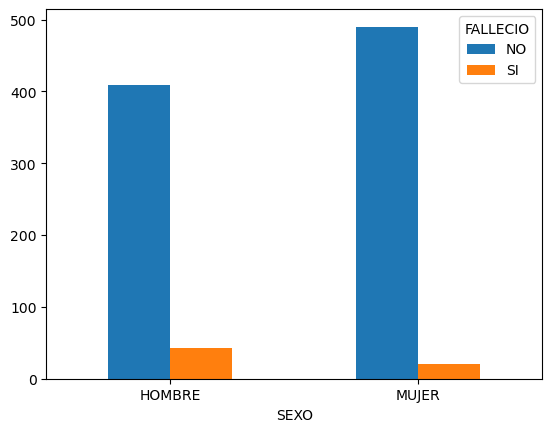

In [36]:
#Correlation between FALLECIO vs SEXO
graphvalues('SEXO',complete_data2,0)
plt.show()

FALLECIO            NO  SI
RANGO DE EDAD             
<30                269   2
Between 31 and 50  377  11
Between 51 and 70  211  35
71 and more         42  15
P value = 4.721150925957869e-18
The variables ARE correlated, Pvalue<0.05 ,we reject H0


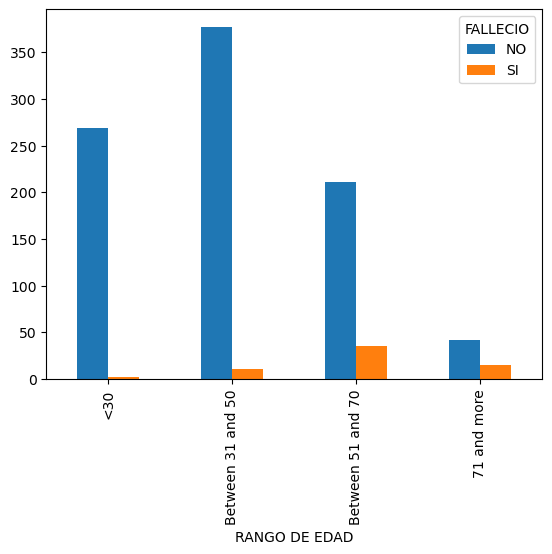

In [37]:
#Correlation between FALLECIO vs EDAD
complete_data3=complete_data2.copy()
#Split data considering the pacients age range
ages=[0,30,50,70,120]
age_ranges=["<30","Between 31 and 50","Between 51 and 70","71 and more"]
# Slice the data and place it into bins
complete_data3["RANGO DE EDAD"] = pd.cut(complete_data3["EDAD"],
                                              ages, labels=age_ranges,
                                              include_lowest=True)

graphvalues('RANGO DE EDAD',complete_data3,90)
plt.show()

FALLECIO  NO  SI
INTUBADO        
NO        90  40
SI         5  12
P value = 0.003082403700060319
The variables ARE correlated, Pvalue<0.05 ,we reject H0


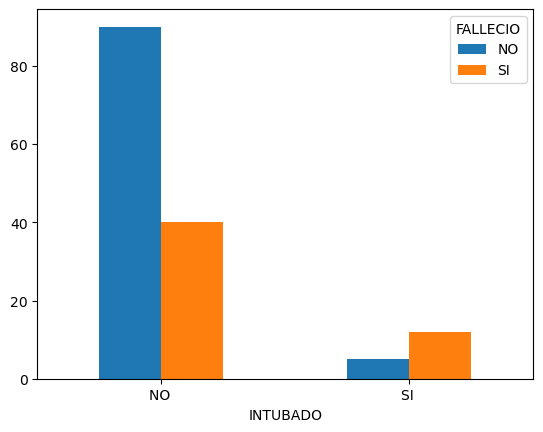

In [38]:
#Correlation between FALLECIO vs INTUBADO
graphvalues('INTUBADO',complete_data2,0)
plt.show()

FALLECIO   NO  SI
EMBARAZO         
NO        485  20
SI          4   0
P value = 1.0
The variables are NOT correlated, Pvalue>0.05 ,we accept H0


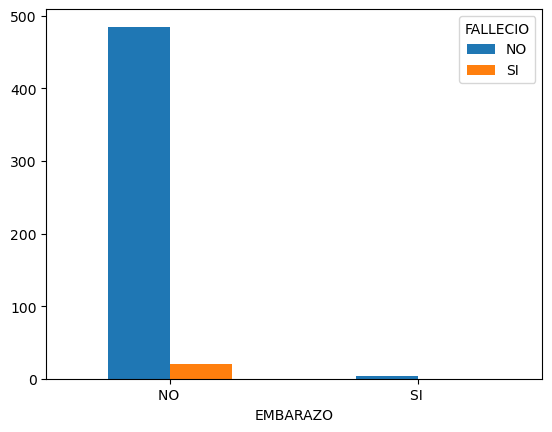

In [39]:
#Correlation between FALLECIO vs EMBARAZO
graphvalues('EMBARAZO',complete_data2,0)
plt.show()

FALLECIO   NO  SI
DIABETES         
NO        809  39
SI         88  24
P value = 5.489679736614902e-11
The variables ARE correlated, Pvalue<0.05 ,we reject H0


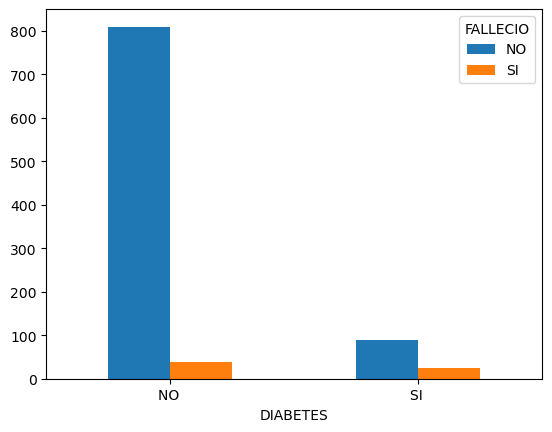

In [40]:
#Correlation between FALLECIO vs DIABETES
graphvalues('DIABETES',complete_data2,0)
plt.show()

FALLECIO   NO  SI
EPOC             
NO        885  63
SI         11   0
P value = 0.7852299281328414
The variables are NOT correlated, Pvalue>0.05 ,we accept H0


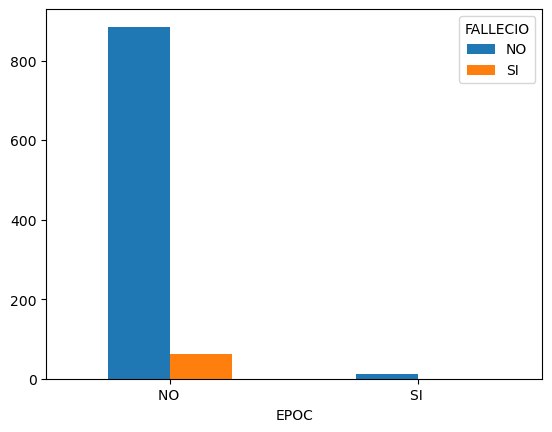

In [41]:
#Correlation between FALLECIO vs EPOC
graphvalues('EPOC',complete_data2,0)
plt.show()

FALLECIO   NO  SI
ASMA             
NO        868  61
SI         28   2
P value = 1.0
The variables are NOT correlated, Pvalue>0.05 ,we accept H0


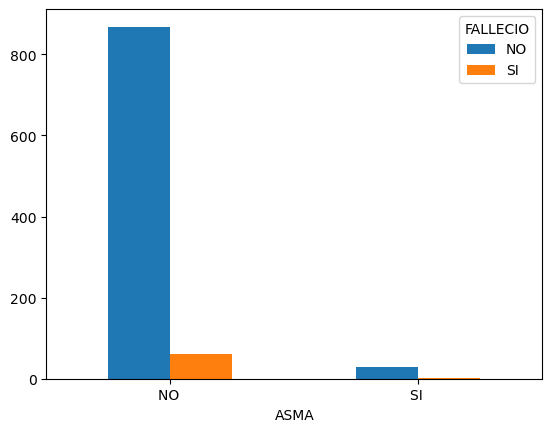

In [42]:
#Correlation between FALLECIO vs ASMA
graphvalues('ASMA',complete_data2,0)
plt.show()

FALLECIO   NO  SI
INMUSUPR         
NO        886  59
SI         11   4
P value = 0.008198679638946688
The variables ARE correlated, Pvalue<0.05 ,we reject H0


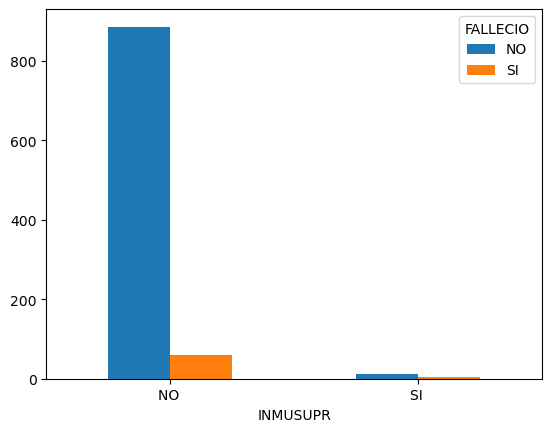

In [43]:
#Correlation between FALLECIO vs INMUSUPR
graphvalues('INMUSUPR',complete_data2,0)
plt.show()

FALLECIO       NO  SI
HIPERTENSION         
NO            778  31
SI            115  32
P value = 3.2068164582081693e-15
The variables ARE correlated, Pvalue<0.05 ,we reject H0


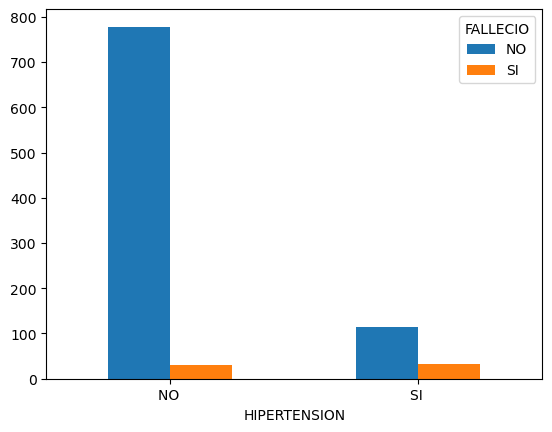

In [44]:
#Correlation between FALLECIO vs HIPERTENSION
graphvalues('HIPERTENSION',complete_data2,0)
plt.show()

FALLECIO         NO  SI
CARDIOVASCULAR         
NO              879  59
SI               16   4
P value = 0.04638895623370809
The variables ARE correlated, Pvalue<0.05 ,we reject H0


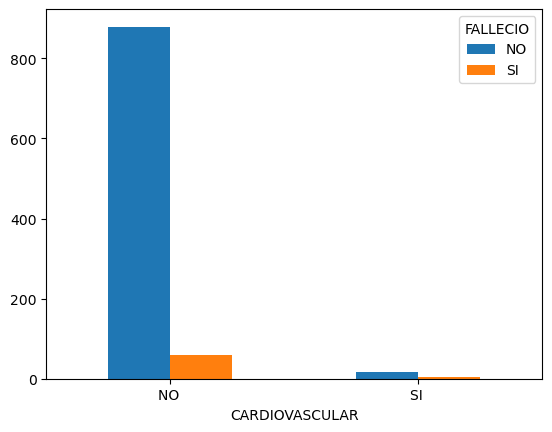

In [45]:
#Correlation between FALLECIO vs CARDIOVASCULAR
graphvalues('CARDIOVASCULAR',complete_data2,0)
plt.show()

FALLECIO   NO  SI
OBESIDAD         
NO        780  56
SI        117   7
P value = 0.8043309780385356
The variables are NOT correlated, Pvalue>0.05 ,we accept H0


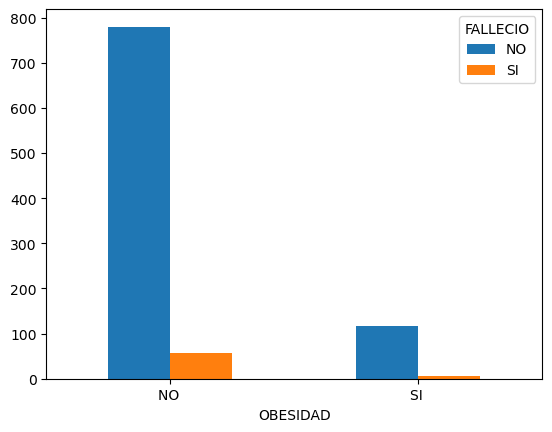

In [46]:
#Correlation between FALLECIO vs OBESIDAD
graphvalues('OBESIDAD',complete_data2,0)
plt.show()

FALLECIO        NO  SI
RENAL_CRONICA         
NO             882  57
SI              14   6
P value = 0.00013438094711231194
The variables ARE correlated, Pvalue<0.05 ,we reject H0


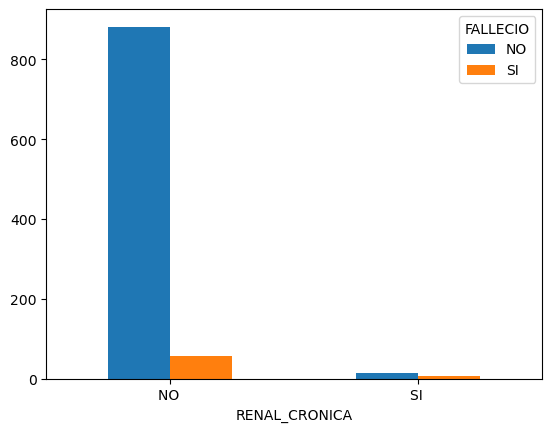

In [47]:
#Correlation between FALLECIO vs RENAL_CRONICA
graphvalues('RENAL_CRONICA',complete_data2,0)
plt.show()

FALLECIO             NO  SI
CUIDADOS_INTENSIVOS        
NO                   86  48
SI                    9   4
P value = 0.9522119531625359
The variables are NOT correlated, Pvalue>0.05 ,we accept H0


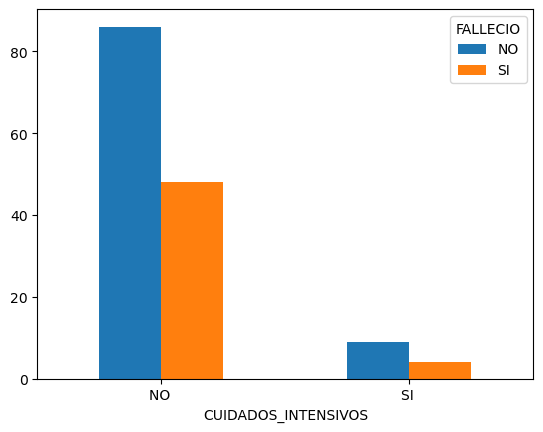

In [48]:
#Correlation between FALLECIO vs CUIDADOS_INTENSIVOS
graphvalues('CUIDADOS_INTENSIVOS',complete_data2,0)
plt.show()

FALLECIO       NO  SI
NACIONALIDAD         
EXTRANJERA      1   0
MEXICANA      898  63
P value = 1.0
The variables are NOT correlated, Pvalue>0.05 ,we accept H0


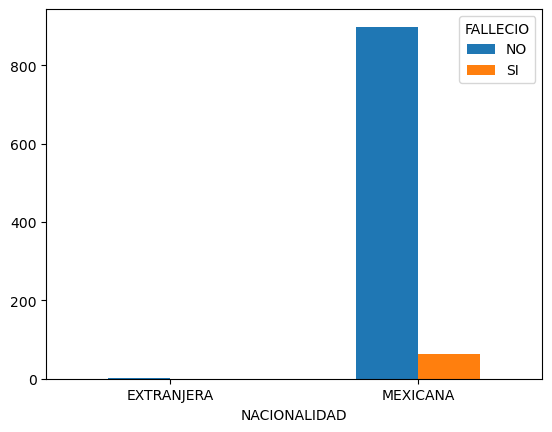

In [49]:
#Correlation between FALLECIO vs NACIONALIDAD
graphvalues('NACIONALIDAD',complete_data2,0)
plt.show()

FALLECIO        NO  SI
TIPO_PACIENTE         
AMBULATORIO    803  10
HOSPITALIZADO   96  53
P value = 1.719223625237947e-53
The variables ARE correlated, Pvalue<0.05 ,we reject H0


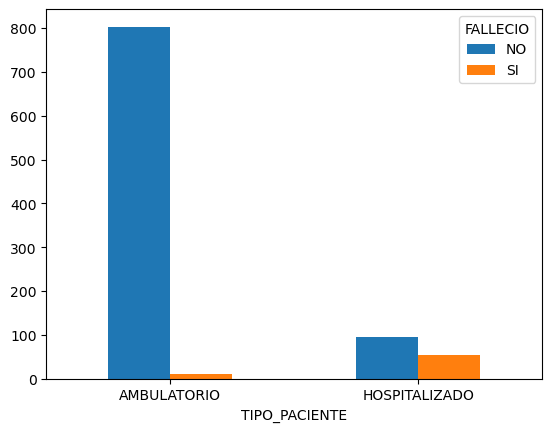

In [50]:
#Correlation between FALLECIO vs TIPO_PACIENTE
graphvalues('TIPO_PACIENTE',complete_data2,0)
plt.show()

FALLECIO                          NO  SI
ENTIDAD_UM                              
AGUASCALIENTES                    14   1
BAJA CALIFORNIA                   23   0
BAJA CALIFORNIA SUR               13   0
CAMPECHE                           5   0
CHIAPAS                           17   0
CHIHUAHUA                         12   1
CIUDAD DE MEXICO                 311  11
COAHUILA DE ZARAGOZA              24   4
COLIMA                             5   0
DURANGO                           13   2
GUANAJUATO                        36   1
GUERRERO                          14   3
HIDALGO                            7   1
JALISCO                           36   1
MEXICO                            58   9
MICHOACAN DE OCAMPO               17   1
MORELOS                            4   1
NAYARIT                            1   0
NUEVO LEON                        44   6
OAXACA                            11   1
PUEBLA                            22   5
QUERETARO                         21   1
QUINTANA ROO    

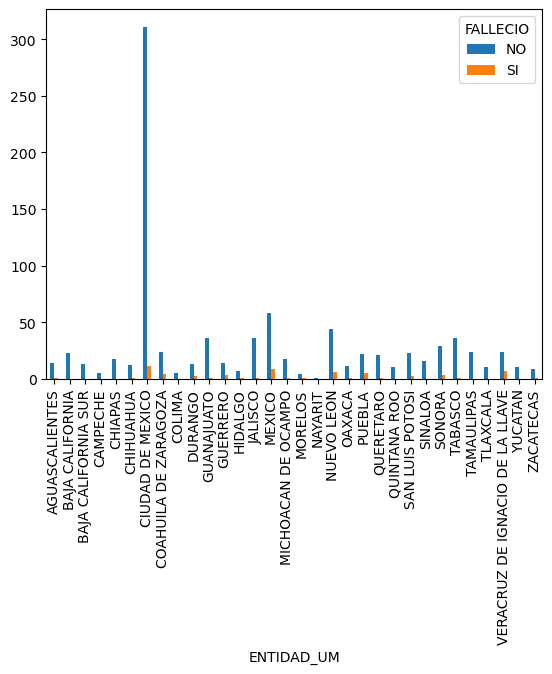

In [51]:
#Correlation between FALLECIO vs ENTIDAD_UM
graphvalues('ENTIDAD_UM',complete_data2,90)
plt.show()

FALLECIO         NO  SI
SECTOR                 
DIF               1   0
ESTATAL           8   1
IMSS            218  38
IMSS-BIENESTAR    1   1
ISSSTE           35   6
PEMEX             9   2
PRIVADA          21   0
SEDENA            4   0
SEMAR             4   0
SSA             596  15
UNIVERSITARIO     2   0
P value = 2.298309407727875e-09
The variables ARE correlated, Pvalue<0.05 ,we reject H0


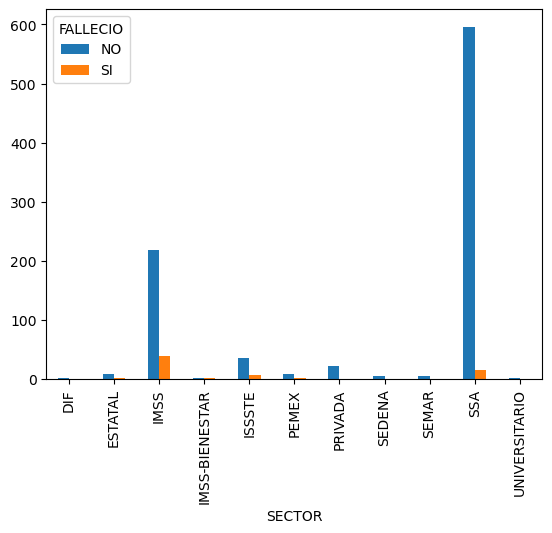

In [52]:
#Correlation between FALLECIO vs SECTOR
graphvalues('SECTOR',complete_data2,90)
plt.show()

FALLECIO        NO  SI
RESULTADO_LAB         
NEGATIVO       405  15
POSITIVO       284  37
P value = 5.001640710905973e-05
The variables ARE correlated, Pvalue<0.05 ,we reject H0


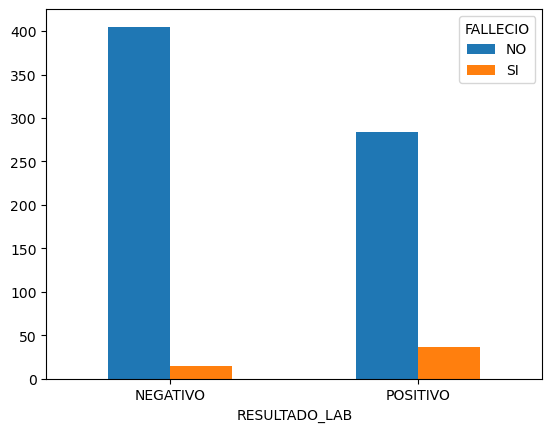

In [53]:
#Correlation between FALLECIO vs RESULTADO_LAB
graphvalues('RESULTADO_LAB',complete_data2,0)
plt.show()

FALLECIO            NO  SI
RESULTADO_ANTIGENO        
NEGATIVO            86   0
POSITIVO            32   3
P value = 0.03532388709382524
The variables ARE correlated, Pvalue<0.05 ,we reject H0


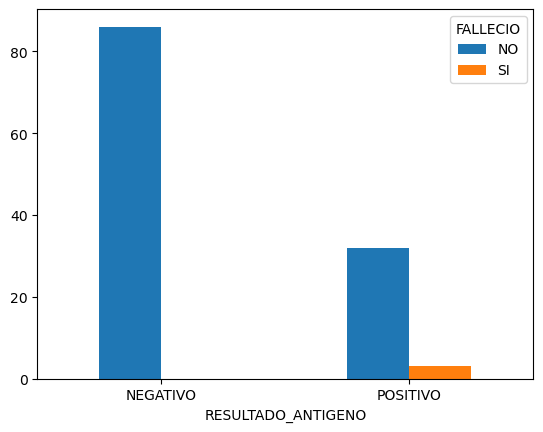

In [54]:
#Correlation between FALLECIO vs RESULTADO_ANTIGENO
graphvalues('RESULTADO_ANTIGENO',complete_data2,0)
plt.show()

FALLECIO                       NO  SI
CLASIFICACION_FINAL                  
CASO SOSPECHOSO                65   3
CONFIRMADO                    314  38
CONFIRMADO POR ASOCIACION      20   1
CONFIRMADO POR COMITE           0   6
INVALIDO POR LABORATORIO        3   0
NEGATIVO                      480  15
NO REALIZADO POR LABORATORIO   17   0
P value = 5.28500032795751e-21
The variables ARE correlated, Pvalue<0.05 ,we reject H0


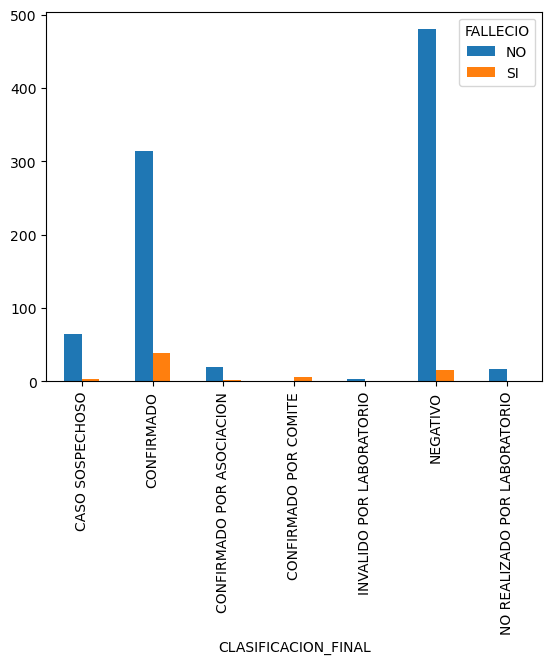

In [55]:
#Correlation between FALLECIO vs CLASIFICACION_FINAL
graphvalues('CLASIFICACION_FINAL',complete_data2,90)
plt.show()